In [47]:
import pandas as pd
from settings import *
from scrape import *
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [2]:
#scrapePage(anacUrl)

In [3]:
situacaoVoos = []
fileCsvFinal = pd.DataFrame()
for ano in range(2015, 2020):
    print(f"Lendo os arquivos do ano {ano}")
    for i in range(1, 13):
            sep = [';', ',','\t']
            sepIndex = 0
            while True:
                try:
                    fileCsv = pd.read_csv(
                        f'data/{ano}-{i:02}.csv', encoding='ISO-8859-1', sep=sep[sepIndex], low_memory=False)
                    if ('internet' in fileCsv.columns[0]):
                        fileCsv.columns = fileCsv.iloc[0]
                        fileCsv = fileCsv[1:]
                    if len(fileCsv.columns) <= 1:
                        raise ValueError('sepIndex')
                    else:
                        try:
                            fileCsv = fileCsv.drop(columns='Data Prevista')
                        except:
                            pass
                        fileCsv.columns = ['ICAO Empresa Aérea', 'Número Voo', 'Código DI', 'Código Tipo Linha',
                                        'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Partida Prevista',
                                        'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situação Voo',
                                        'Código Justificativa']
                    
                    fileCsv = fileCsv.assign(Ano = ano)
                    fileCsv = fileCsv.assign(Mes = i)
                    
                    fileCsvFinal = pd.concat([fileCsvFinal, fileCsv])
                    print(len(fileCsvFinal))
                    break
                except Exception as e:
                    if e.args[0] == 'sepIndex':
                        if (sepIndex < 3):
                            sepIndex += 1
                    else:
                        print(e)
fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.upper()
fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.replace('NÃO REALIZADO', 'CANCELADO', regex=False)

In [5]:
situacaoVoos = fileCsvFinal['Situação Voo'].value_counts()
situacaoVoos

REALIZADO    5077785
CANCELADO     485822
Name: Situação Voo, dtype: int64

In [7]:
teste = fileCsvFinal[['Situação Voo']].groupby(fileCsvFinal['ICAO Empresa Aérea'])

,Realizado,Cancelado
2015,1127070,174500
2016,1004756,134250
2017,992040,113444
2018,988725,45831
2019,965194,17797


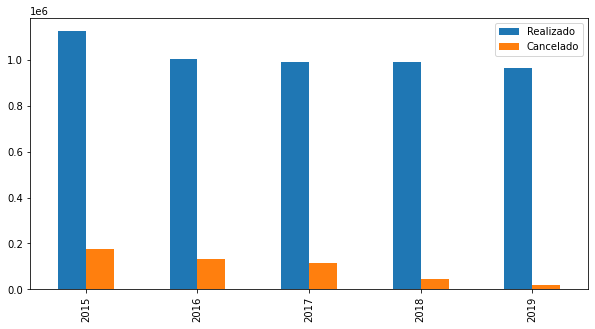

In [8]:
SituacaoPorAno = pd.DataFrame()
for situacao in fileCsvFinal['Situação Voo'].unique():
    df = fileCsvFinal.loc[fileCsvFinal['Situação Voo'] == situacao]
    df = df['Ano'].value_counts()
    SituacaoPorAno= pd.concat([SituacaoPorAno, df], axis=1)
SituacaoPorAno.columns = ['Realizado', 'Cancelado']
SituacaoPorAno.plot(kind='bar',figsize=(10,5))
SituacaoPorAno

Realizados : 5077785
Cancelados : 485822


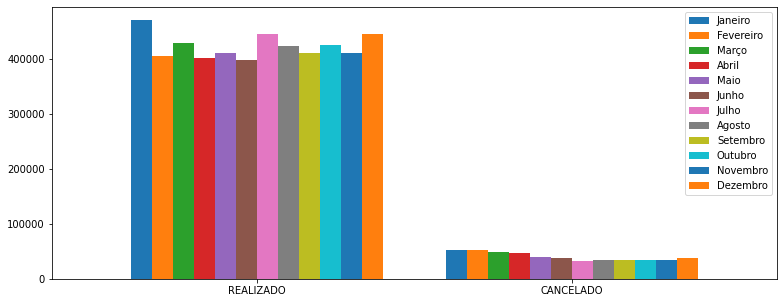

In [175]:
fig, axs = plt.subplots(figsize=(13, 5))
SituacaoPorMes = pd.DataFrame()
for mes in range(1, 13):
    df = fileCsvFinal.loc[fileCsvFinal['Mes'] == mes]
    df = df['Situação Voo'].value_counts()
    SituacaoPorMes= pd.concat([SituacaoPorMes, df], axis=1)
SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
SituacaoPorMes.plot(kind='bar', ax=axs, width=0.8)
labels = axs.get_xticklabels()
for label in labels:
    label.set_rotation(0)
print(f"Realizados : {int(SituacaoPorMes.iloc[0].sum())}")
print(f"Cancelados : {int(SituacaoPorMes.iloc[1].sum())}")

In [174]:
def f(ano):
    df = fileCsvFinal.loc[fileCsvFinal['Ano'] == ano]
    fig, axs = plt.subplots(figsize=(13, 5))
    SituacaoPorMes = pd.DataFrame()
    for mes in range(1, 13):
        df2 = df.loc[df['Mes'] == mes]
        df2 = df2['Situação Voo'].value_counts()
        SituacaoPorMes= pd.concat([SituacaoPorMes, df2], axis=1)
    SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
    SituacaoPorMes.plot(kind='bar', ax=axs, width=0.8)
    labels = axs.get_xticklabels()
    for label in labels:
        label.set_rotation(0)
    print(f"Média de voos realizados : {np.around(int(SituacaoPorMes.iloc[0].mean()))}")
    print(f"Média de voos cancelados : {np.around(int(SituacaoPorMes.iloc[1].mean()))}")
    plt.ylabel('Quantidade de voos por mês')

interact(f, ano=widgets.IntSlider(min=2015,max=2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2015), Output()), _dom_classes=('…

<function __main__.f(ano)>

## Número de voos realizados

In [168]:
# fig, axs = plt.subplots(figsize=(10, 5))
explode = (0.05, 0, 0, 0, 0)

# maioresEmpresas = fileCsvFinal['ICAO Empresa Aérea'].value_counts()
def f(ano):
    df = fileCsvFinal[fileCsvFinal['Situação Voo'] == 'REALIZADO']
    df = df[df['Ano'] == ano]['ICAO Empresa Aérea'].value_counts()
    teste2 = df[df < df[4]]
    x = pd.Series({'Outros' : teste2.sum()})
    y = pd.concat([df[:4], x])
    y.plot(kind='pie',autopct='%1.1f%%', explode=explode, shadow=True)

interact(f, ano=widgets.IntSlider(min=2015,max=2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2015), Output()), _dom_classes=('…

<function __main__.f(ano)>

## Número de voos cancelados

In [169]:
explode = (0.05, 0, 0, 0, 0)

def f(ano):
    df = fileCsvFinal[fileCsvFinal['Situação Voo'] != 'REALIZADO']
    df = df[df['Ano'] == ano]['ICAO Empresa Aérea'].value_counts()
    teste2 = df[df < df[4]]
    x = pd.Series({'Outros' : teste2.sum()})
    y = pd.concat([df[:4], x])
    y.plot(kind='pie',autopct='%1.1f%%', explode=explode, shadow=True)

interact(f, ano=widgets.IntSlider(min=2015,max=2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2015), Output()), _dom_classes=('…

<function __main__.f(ano)>

<AxesSubplot:>

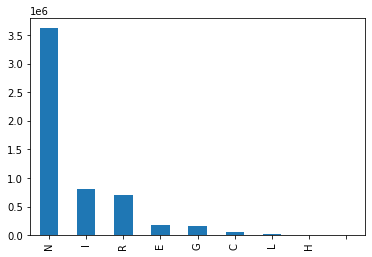

In [165]:
fileCsvFinal['Código Tipo Linha'].value_counts().plot(kind='bar')